In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Data exploration

In [22]:
blockchain_data = pd.read_csv("C:/Users/peter/Documents/Data Science/Final Project/Data/BTC_blockchain_data.csv")
blockchain_data.head()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount
0,1,1231469665000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0
1,2,1231469744000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0
2,3,1231470173000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0
3,4,1231470988000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0
4,5,1231471428000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0


In [23]:
blockchain_data.tail(10)

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount
810899,810900,1696593279000,1770765,986,5.732151e+13,3.782091,4,4833588,2.019481,255.474453,8339,2779,375597733458
810900,810901,1696593665000,1703918,1864,5.732151e+13,4.051628,17,17668896,2.000000,301.595745,9944,6831,719122429350
810901,810902,1696594502000,1274059,2052,5.732151e+13,47.063912,50,50849735,32.000000,427.725400,6923,6059,324439164783
810902,810903,1696595261000,1504916,2653,5.732151e+13,28.441392,32,32514152,13.000000,427.853547,5958,13500,1968956111062
810903,810904,1696595805000,1471359,2641,5.732151e+13,14.427431,25,25173010,4.063158,301.595745,7170,9522,760137461952
810904,810905,1696596349000,1427754,2288,5.732151e+13,6.823732,23,23663392,3.981087,365.700185,7335,7223,1160691582276
810905,810906,1696596615000,1612966,2016,5.732151e+13,3.992902,15,15483511,2.002928,1113.424658,8874,5749,463722361068
810906,810907,1696599420000,1486563,3496,5.732151e+13,52.845687,63,63223285,47.189516,1508.012821,6070,14579,2469100614701
810907,810908,1696599441000,1647105,3397,5.732151e+13,45.994549,44,44811365,33.665904,531.342012,8333,9388,510973071832
810908,810909,1696599727000,1569768,2691,5.732151e+13,25.035653,31,31089016,11.251142,434.092474,7679,8304,1877353542478


In [24]:
blockchain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810909 entries, 0 to 810908
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   height           810909 non-null  int64  
 1   timestamp        810909 non-null  int64  
 2   size             810909 non-null  int64  
 3   tx_count         810909 non-null  int64  
 4   difficulty       810909 non-null  float64
 5   median_fee_rate  810909 non-null  float64
 6   avg_fee_rate     810909 non-null  int64  
 7   total_fees       810909 non-null  int64  
 8   fee_range_min    810909 non-null  float64
 9   fee_range_max    810909 non-null  float64
 10  input_count      810909 non-null  int64  
 11  output_count     810909 non-null  int64  
 12  output_amount    810909 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 80.4 MB


In [25]:
blockchain_data.describe()

,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount
count,810909.000000,8.109090e+05,8.109090e+05,810909.000000,8.109090e+05,8.109090e+05,8.109090e+05,8.109090e+05,810909.000000,8.109090e+05,810909.000000,810909.000000,8.109090e+05
mean,405455.000000,1.463145e+12,6.368604e+05,1114.228252,7.821774e+12,5.471805e+01,9.278163e+01,3.338226e+07,9.402941,2.077464e+11,2901.063285,3124.744520,1.040484e+12
std,234089.409057,1.316681e+11,6.049152e+05,1123.477520,1.309055e+13,1.200296e+03,1.878187e+03,9.149828e+07,147.243597,1.870766e+14,2703.436749,3286.867946,3.474395e+12
min,1.000000,1.231470e+12,1.760000e+02,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,202728.000000,1.349909e+12,3.443600e+04,70.000000,2.968775e+06,1.000000e+00,1.000000e+01,1.990533e+06,0.000000,2.240000e+02,158.000000,171.000000,8.352319e+10
50%,405455.000000,1.459631e+12,4.578980e+05,682.000000,1.668515e+11,1.400000e+01,2.900000e+01,1.055251e+07,1.000000,4.710000e+02,2115.000000,1866.000000,4.009393e+11
75%,608182.000000,1.576390e+12,1.152508e+06,2098.000000,1.300809e+13,5.000000e+01,8.200000e+01,3.127132e+07,1.000000,1.295000e+03,5411.000000,5537.000000,1.130377e+12
max,810909.000000,1.696600e+12,3.978938e+06,12239.000000,5.732151e+13,1.029502e+06,1.143052e+06,2.915328e+10,56155.000000,1.684634e+17,20894.000000,23642.000000,6.499324e+14


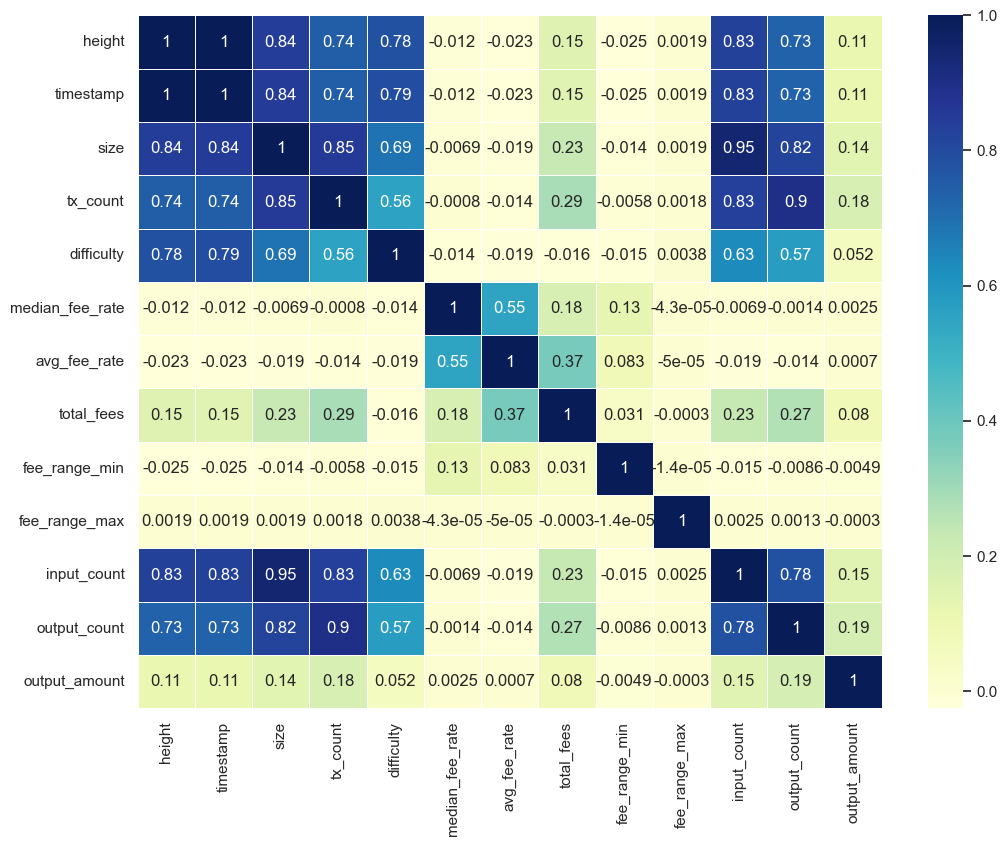

In [26]:
# Correlation matrix

plt.figure(figsize = (12, 9))
sns.heatmap(blockchain_data.corr(), cmap = 'YlGnBu', annot = True, linewidths = 0.7)
plt.show()

Year based analysis

In [27]:
# Create a column that holds the year of the transaction

import datetime

def extract_year(timestamp):
    try:
        timestamp_seconds = timestamp / 1000
        return datetime.datetime.fromtimestamp(timestamp_seconds).year
    except (ValueError, OSError):
        return None # for invalid timestamps
    
blockchain_new = blockchain_data.copy()
blockchain_new['year'] = blockchain_new['timestamp'].apply(extract_year)

blockchain_new.head(10)


,height,timestamp,size,tx_count,difficulty,median_fee_rate,avg_fee_rate,total_fees,fee_range_min,fee_range_max,input_count,output_count,output_amount,year
0,1,1231469665000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
1,2,1231469744000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
2,3,1231470173000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
3,4,1231470988000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
4,5,1231471428000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
5,6,1231471789000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
6,7,1231472369000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
7,8,1231472743000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
8,9,1231473279000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009
9,10,1231473952000,215,1,1.0,0.0,0,0,0.0,0.0,0,1,0,2009


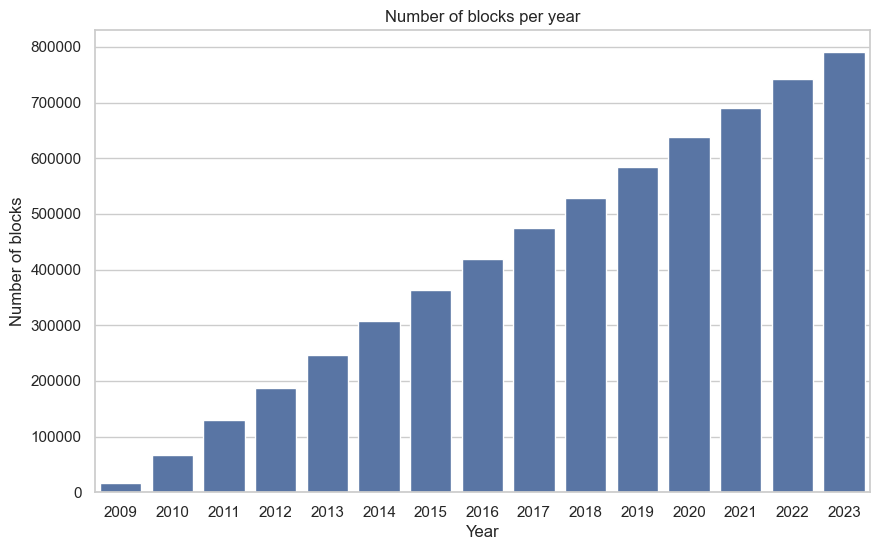

In [28]:
# Number of blocks per year

sns.set(style = 'whitegrid')

block_numbers = blockchain_new.groupby('year')['height'].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = block_numbers.index, y = block_numbers.values)
plt.xlabel('Year')
plt.ylabel('Number of blocks')
plt.title('Number of blocks per year')
plt.show()

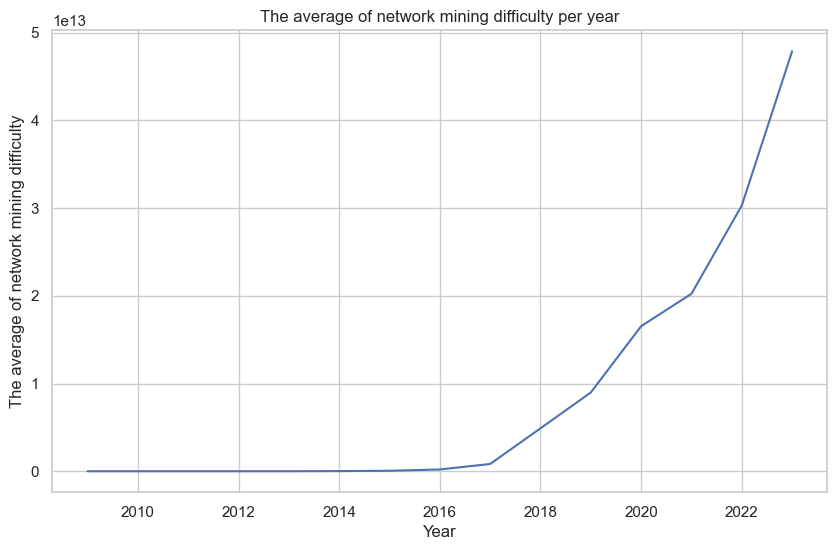

In [29]:
# Average of the network mining difficulty per year

sns.set(style = 'whitegrid')

difficulty_mean = blockchain_new.groupby('year')['difficulty'].mean()

plt.figure(figsize = (10, 6))
sns.lineplot(x = difficulty_mean.index, y = difficulty_mean.values)
plt.xlabel('Year')
plt.ylabel('The average of network mining difficulty')
plt.title('The average of network mining difficulty per year')
plt.show()

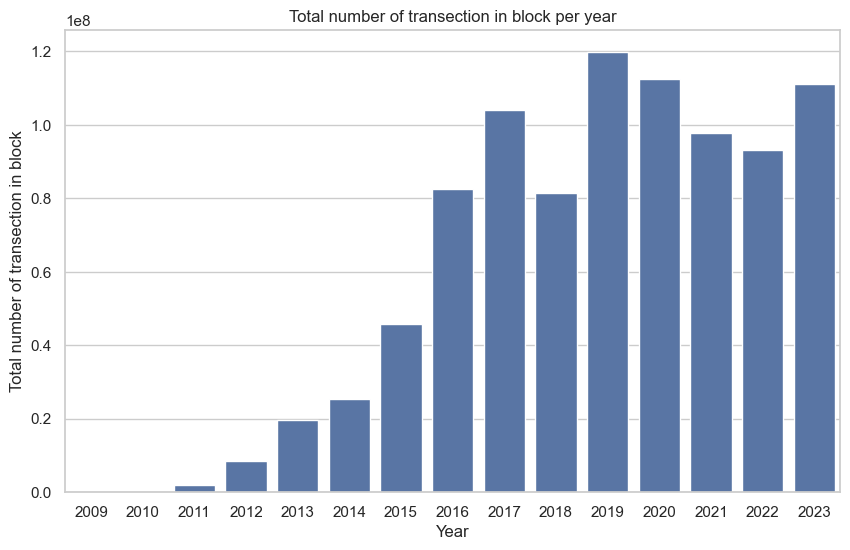

In [30]:
# Total number of transection in block per year

sns.set(style="whitegrid")

tx_count_sum = blockchain_new.groupby('year')['tx_count'].sum()

plt.figure(figsize = (10, 6))
sns.barplot(x = tx_count_sum.index, y = tx_count_sum.values)
plt.xlabel('Year')
plt.ylabel('Total number of transection in block')
plt.title('Total number of transection in block per year')
plt.show()

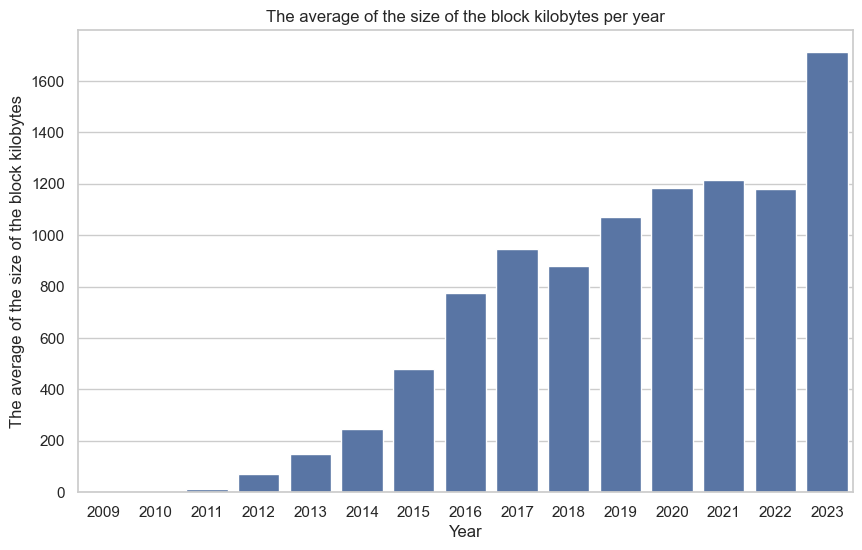

In [31]:
# Average of the size of the block kilobytes per year

sns.set(style = 'whitegrid')

avg_size = blockchain_new.groupby('year')['size'].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = avg_size.index, y = avg_size.values / 1000)
plt.xlabel('Year')
plt.ylabel('The average of the size of the block kilobytes')
plt.title('The average of the size of the block kilobytes per year')
plt.show()

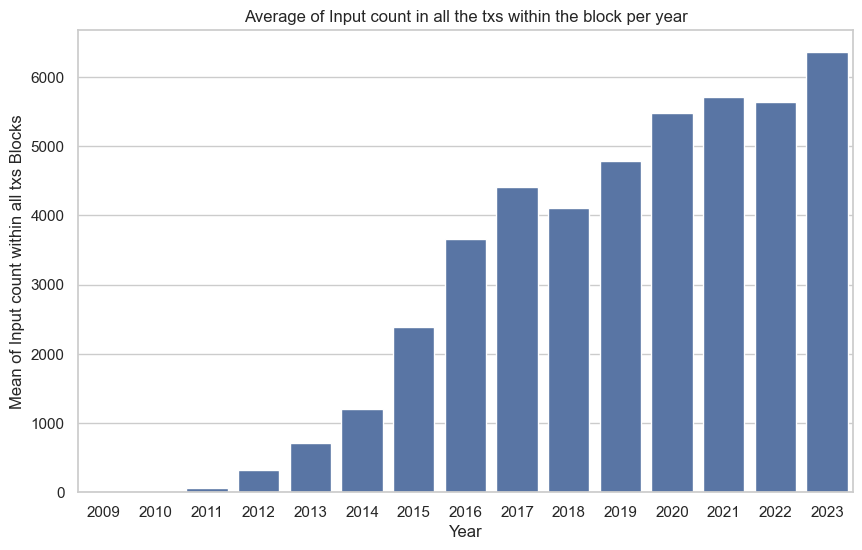

In [32]:
# Average of input count per year

input_count_mean = blockchain_new.groupby('year')['input_count'].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = input_count_mean.index, y = input_count_mean.values)
plt.xlabel('Year')
plt.ylabel('Mean of Input count within all txs Blocks')
plt.title('Average of Input count in all the txs within the block per year')
plt.show()

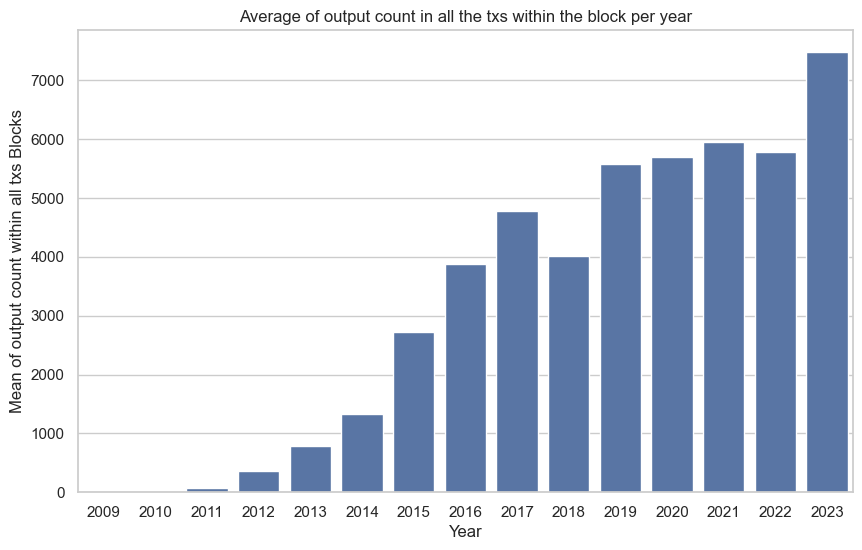

In [33]:
# Average of oputput count per year

output_count_mean = blockchain_new.groupby('year')['output_count'].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x = output_count_mean.index, y = output_count_mean.values)
plt.xlabel('Year')
plt.ylabel('Mean of output count within all txs Blocks')
plt.title('Average of output count in all the txs within the block per year')
plt.show()

Based on our analysis, we can see that in 2017 the 'input_count', 'output_count', 'size'  and 'tx_xount', are higher and price is incresed faster compare to 2016 and 2018.

In [34]:
# Feature engineering

blockchain_data.set_index('timestamp', inplace = True)
blockchain_data.reset_index(inplace = True)

blockchain_data['timestamp'] = pd.to_datetime(blockchain_data['timestamp'], unit = 'ms')
blockchain_data.head()

blockchain_data['day_of_week'] = blockchain_data['timestamp'].dt.dayofweek
blockchain_data['month'] = blockchain_data['timestamp'].dt.month
blockchain_data['hour'] = blockchain_data['timestamp'].dt.hour

blockchain_data['transaction_rate'] = blockchain_data['tx_count'] / blockchain_data['size']

blockchain_data['fee_range_spread'] = blockchain_data['fee_range_max'] - blockchain_data['fee_range_min']

blockchain_data['input_out_discrepancies'] = blockchain_data['input_count'] - blockchain_data['output_count']

blockchain_data['transaction_density'] = blockchain_data['tx_count'] / blockchain_data['difficulty']

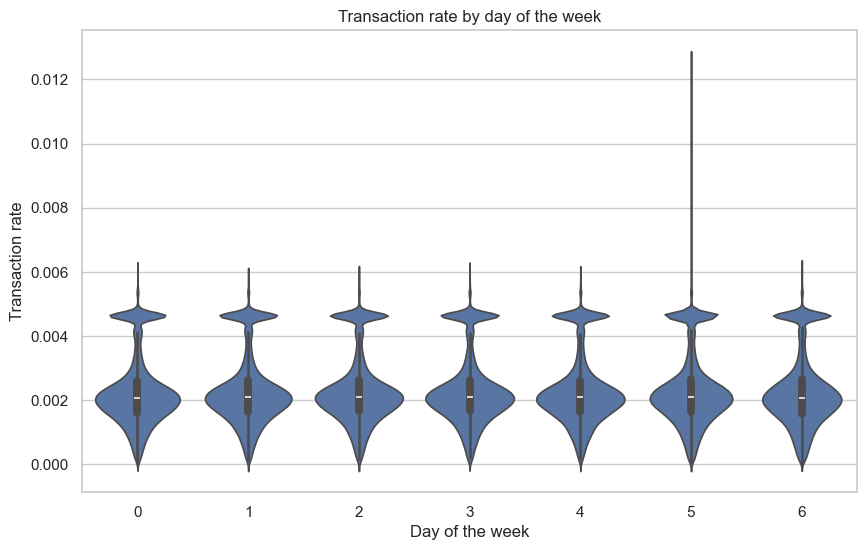

In [35]:
# Transaction rate by day of the week

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'day_of_week', y = 'transaction_rate', data = blockchain_data)
plt.title('Transaction rate by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Transaction rate')
plt.show()


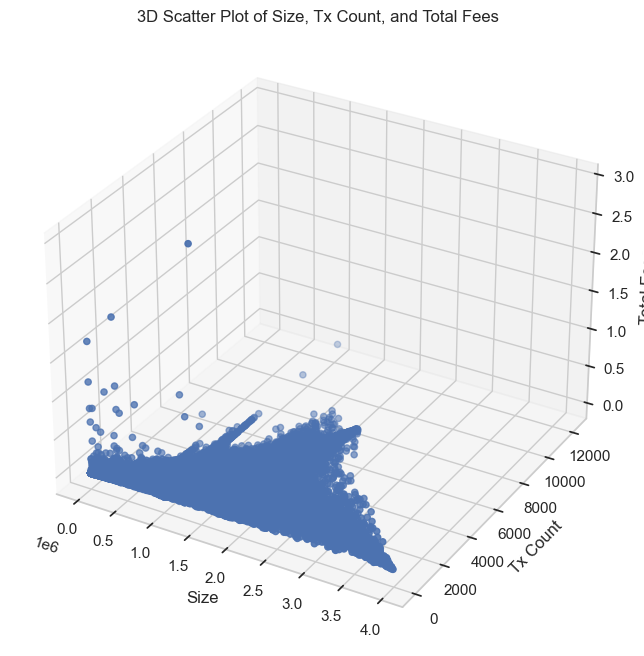

In [36]:
# 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(blockchain_data['size'], blockchain_data['tx_count'], blockchain_data['total_fees'])
ax.set_xlabel('Size')
ax.set_ylabel('Tx Count')
ax.set_zlabel('Total Fees')
plt.title('3D Scatter Plot of Size, Tx Count, and Total Fees')
plt.show()
